In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df=pd.read_csv("placement.csv")

In [21]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [22]:
df.columns

Index(['Unnamed: 0', 'cgpa', 'iq', 'placement'], dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [24]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [25]:
df.shape

(100, 3)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [27]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [28]:
df.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

In [29]:
df.shape

(100, 3)

<Axes: >

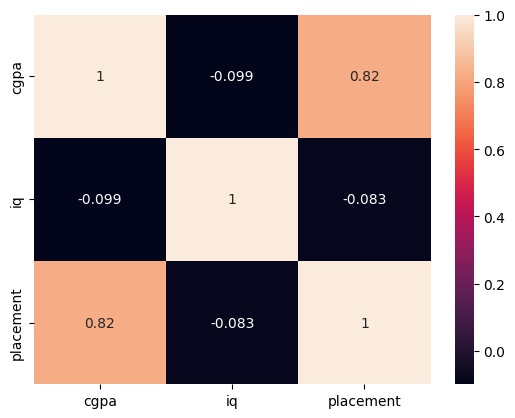

In [30]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='cgpa', ylabel='iq'>

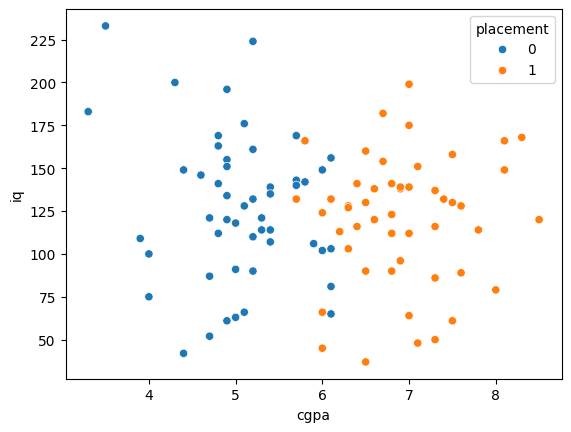

In [31]:
sns.scatterplot(x=df['cgpa'],y=df['iq'],hue=df['placement'])

In [32]:
x=df.drop('placement',axis=1)
y=df['placement']

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_predict=lr.predict(x_test)



In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy_score(y_test,y_predict)
"""acciray is 0.85"""

'acciray is 0.85'

C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

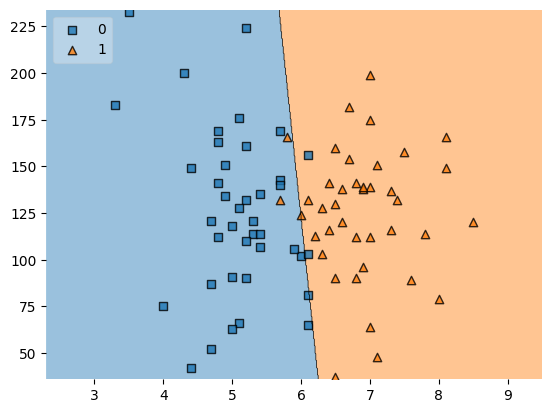

In [39]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(np.array(x_train),np.array(y_train),clf=lr,legend=2)

In [40]:
from sklearn.linear_model import Perceptron
p=Perceptron()
p.fit(x_train,y_train)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,1.0
,n_jobs,None
,random_state,0


In [41]:
p_predict=p.predict(x_test)

In [42]:
p.coef_

array([[262.9,  89. ]])

In [43]:
p.intercept_

array([2.])

C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

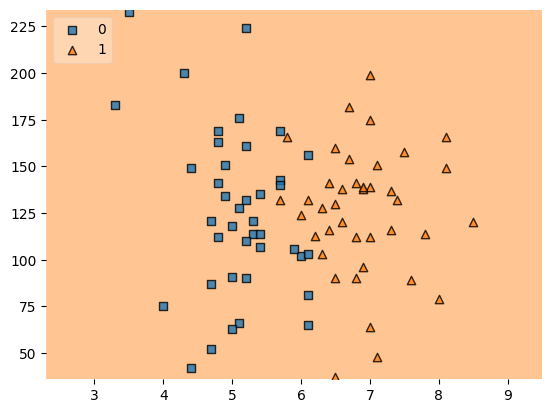

In [44]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(np.array(x_train),np.array(y_train),clf=p,legend=2)

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_matrix(y_test,p_predict)
print(classification_report(y_test,p_predict),'\n',accuracy_score(y_test,p_predict)
)
"""accuracy_score is  0.5"""

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.50      1.00      0.67        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20
 
 0.5


C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

'accuracy_score is  0.5'

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict=dt.predict(x_test)
accuracy_score(y_test,dt_predict)


0.9

C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

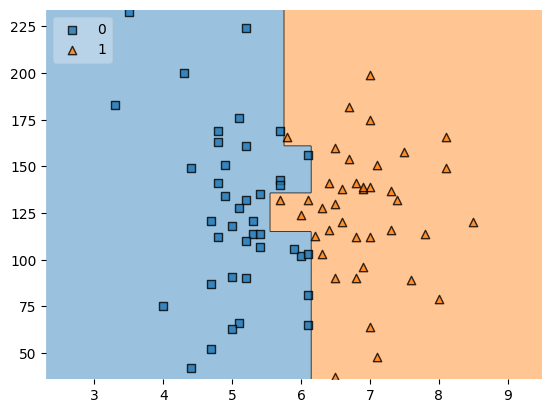

In [50]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(np.array(x_train),np.array(y_train),clf=dt,legend=2)

In [51]:
x=df.drop(['placement'],axis=1)
y=df['placement']


In [52]:
x=np.array(x)
y=np.array(y)
x

array([[  6.8, 123. ],
       [  5.9, 106. ],
       [  5.3, 121. ],
       [  7.4, 132. ],
       [  5.8, 142. ],
       [  7.1,  48. ],
       [  5.7, 143. ],
       [  5. ,  63. ],
       [  6.1, 156. ],
       [  5.1,  66. ],
       [  6. ,  45. ],
       [  6.9, 138. ],
       [  5.4, 139. ],
       [  6.4, 116. ],
       [  6.1, 103. ],
       [  5.1, 176. ],
       [  5.2, 224. ],
       [  3.3, 183. ],
       [  4. , 100. ],
       [  5.2, 132. ],
       [  6.6, 120. ],
       [  7.1, 151. ],
       [  4.9, 120. ],
       [  4.7,  87. ],
       [  4.7, 121. ],
       [  5. ,  91. ],
       [  7. , 199. ],
       [  6. , 124. ],
       [  5.2,  90. ],
       [  7. , 112. ],
       [  7.6, 128. ],
       [  3.9, 109. ],
       [  7. , 139. ],
       [  6. , 149. ],
       [  4.8, 163. ],
       [  6.8,  90. ],
       [  5.7, 140. ],
       [  8.1, 149. ],
       [  6.5, 160. ],
       [  4.6, 146. ],
       [  4.9, 134. ],
       [  5.4, 114. ],
       [  7.6,  89. ],
       [  6

In [53]:
x.shape

(100, 2)

In [232]:
def perceptron(x,y):
    x=np.insert(x,0,1,axis=1)
    weights=np.zeros(x.shape[1])
    learning_rate=1
    for i in range(900000):
        j=np.random.randint(0,100)
        y_pred=step(np.dot(x[j],weights))
        weights=weights+learning_rate*(y[j]-y_pred)*x[j]
    return weights[0],weights[1:]

In [233]:
#return 1 if z>=0 else 0
def step(z):
    if z>=0:
        return 1
    else:
        return 0

In [234]:
df['iq'].min()

np.float64(37.0)

In [235]:
intercept,coefficients=perceptron(x,y)

In [236]:
print("intercept:",intercept)
print("coefficients:",coefficients)

intercept: -31163.0
coefficients: [6760.80000001  -75.        ]


In [237]:
#for y=mx+b line  coefficients: [A=47.09 ,B=1.2 ] C= 0.7 m=-A/B  b=C/B
m=-(coefficients[0]/coefficients[1])
b=-(intercept/coefficients[1])


In [238]:
x_data = np.linspace(3.3,8.5,10)
y_input=m*x_data + b

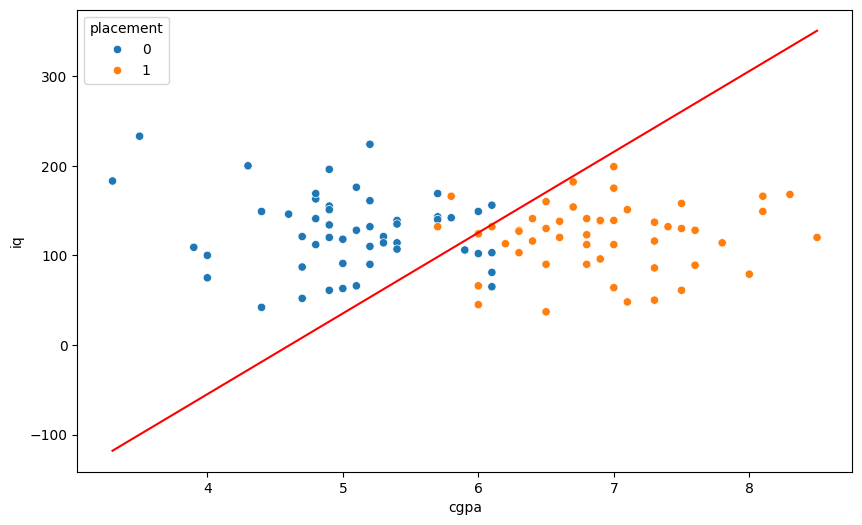

In [239]:

# Cell [84] Code
plt.figure(figsize=(10,6))
plt.plot(x_data,y_input,color='red')
sns.scatterplot(x=df['cgpa'],y=df['iq'],hue=df['placement'])
# ADD THIS LINE TO SUPPRESS THE OBJECT TEXT:
plt.show()

<Axes: xlabel='iq', ylabel='cgpa'>

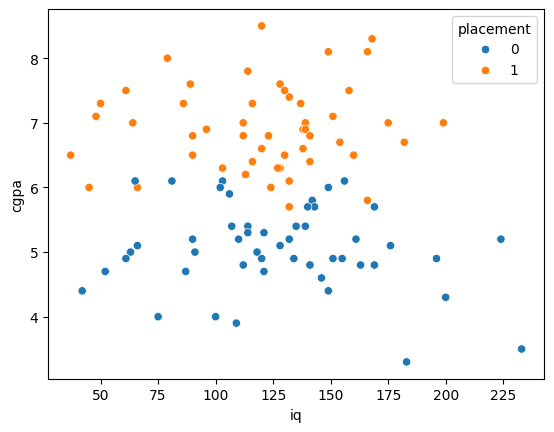

In [240]:
#by loss function
sns.scatterplot(x=df['iq'],y=df['cgpa'],hue=df['placement'])

In [284]:
y_new = np.where(y == 0, -1, 1)

In [296]:
#gradeint descent
def perceptron(x, y):
    # CRITICAL FIX: Ensure all starting weights are floating point for consistency
    w1 = 1.0  
    w2 = 1.0
    b = 1.0
    lr = 0.1
    
    # Simple check to see if an update ever occurs
    updates_occurred = False 
    
    for j in range(1000):
        # Using a fixed counter for updates
        updates_in_epoch = 0 
        for i in range(x.shape[0]):
            # CRITICAL CHECK: Ensure x values are also floats
            x_i_0 = float(x[i][0])
            x_i_1 = float(x[i][1])
            y_i = float(y[i])
            
            z = w1 * x_i_0 + w2 * x_i_1 + b
            
            if z * y_i < 0:
                # Perceptron Update Rule
                w1 = w1 + lr * y_i * x_i_0
                w2 = w2 + lr * y_i * x_i_1
                b = b + lr * y_i
                updates_in_epoch += 1
                updates_occurred = True 
        
        # If no updates occur in the whole loop, we have converged
        if updates_in_epoch == 0 and j > 0:
            break
            
    # CRITICAL DEBUGGING CHECK
    if not updates_occurred:
        print("\n--- WARNING: NO UPDATES OCCURRED! Weights are still initial values. ---")
        
    return w1, w2, b

In [297]:
w1,w2,b=perceptron(x,y_new)

In [298]:
m=-(w1/w2)
c=-(b/w2)
print(m,c)

-149.83684210542717 265.6842105266767


In [299]:
x.min()


np.float64(3.3)

In [300]:
x_ip=np.linspace(250,3.3)
y_input=m*x_ip+c

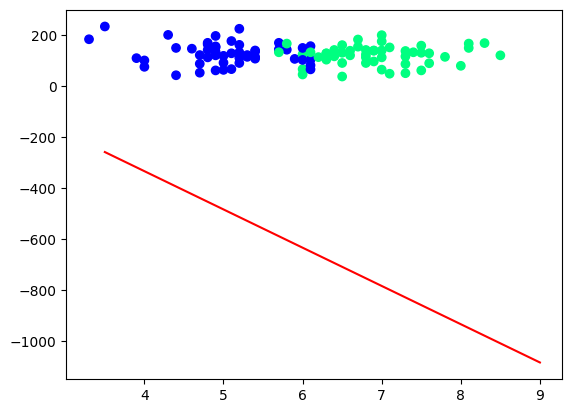

In [301]:
# 1. Define the x-range for the line. Use the actual min/max of your data for best fit.
# Based on the plot, the x-range is roughly 3.5 to 8.5.
x_ip = np.linspace(3.5, 9, 100) 

# 2. Calculate the corresponding y-values for the line
y_input = m * x_ip + c 

# 3. Plot the line (red) and the scattered points
plt.plot(x_ip, y_input, color='red')
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='winter')

# Optional: Add axis labels and show plot
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.show()

In [269]:
print(x.shape)
print(y.shape)

(100, 2)
(100,)


In [295]:
print("New Y unique values:", np.unique(y_new))
print("Y array shape:", y_new.shape)

New Y unique values: [-1  1]
Y array shape: (100,)
